<a href="https://colab.research.google.com/github/ariahosseini/DeepML/blob/main/011_TensorFlow_Proj_Eleven_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
# libs
import os, sys, itertools
import cv2
import numpy as np
import pandas as pd
from skimage import color
# google
from google.colab import drive
# sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# tensorflow
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.image import resize, decode_image
from tensorflow.io import read_file
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import (img_to_array, array_to_img, load_img,
                                                  ImageDataGenerator, DirectoryIterator,
                                                  Iterator)
from tensorflow.keras import Sequential, backend, metrics
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Input,
                                     UpSampling2D, LSTM, RepeatVector,
                                     TimeDistributed, Dropout, Lambda, Reshape,
                                     Flatten, Conv2DTranspose, Layer, Concatenate)
from tensorflow.python.framework.ops import disable_eager_execution, enable_eager_execution
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# seed
np.random.seed(42)

In [ ]:
# versions
print("Tensorflow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

Tensorflow version: 2.15.0
OpenCV version: 4.8.0


In [ ]:
# processing unit
physical_devices = tf.config.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# curr dir
os.getcwd()

'/content'

In [ ]:
# working dir
working_dir = '/content/drive/MyDrive'
os.listdir(working_dir)

['Lottery',
 'Colab Notebooks',
 'dogs-vs-cats',
 'animals',
 'LaEterna',
 'walmart',
 'amazon',
 'arff_files',
 'forest_fires',
 'secom',
 'handwritten_text',
 'fashion',
 'employee',
 'jena_climate',
 'Multi_Digit_Mnist',
 'support2.csv',
 'I-485 Read First (T5).zip',
 'NIW',
 'anomaly.csv',
 'GE.csv',
 'maps',
 'Sandstone',
 'disc_model.png',
 'generator_model.png',
 'combined_model.png',
 'augmented_image2.jpg',
 'Jupyter Notebooks',
 'Notebooks']

In [ ]:
# change dir to working_dir
os.chdir(working_dir)
assert os.getcwd() == working_dir

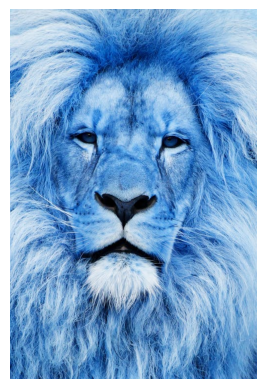

In [ ]:
# input img
img = cv2.imread("animals/africa-african-animal-cat-41315.jpeg")
plt.imshow(img)
plt.axis('off')
plt.show()

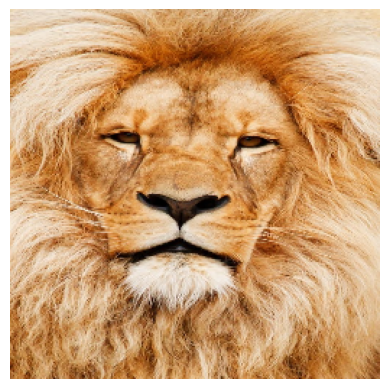

In [ ]:
# format the input
SIZE=256 # image shape: (SIZE, SIZE, 3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # change from BGR to RGB
img = cv2.resize(img, (SIZE, SIZE))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# append to the data set and scale it
img_data=[]
img_data.append(img_to_array(img))
img_arr = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_arr = img_arr.astype("float32")/ 255.


# Encoder Decoder Model

In [ ]:
# clear session
clear_session()

In [ ]:
# define model
model = Sequential(name="seq_model")
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", use_bias=True, kernel_initializer='glorot_uniform',
                 bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, input_shape=(SIZE, SIZE, 3), name= "conv_layer_one"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', name="max_pool_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_two"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_two"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_three"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_three"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_four"))
model.add(UpSampling2D((2,2), interpolation='nearest', name="up_smaple_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_five"))
model.add(UpSampling2D((2,2), interpolation='nearest', name="up_smaple_layer_two"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_six"))
model.add(UpSampling2D((2,2), interpolation='nearest', name="up_smaple_layer_three"))
model.add(Conv2D(filters=3, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_seven"))
model.summary()

Model: "seq_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_one (Conv2D)     (None, 256, 256, 32)      896       
                                                                 
 max_pool_layer_one (MaxPoo  (None, 128, 128, 32)      0         
 ling2D)                                                         
                                                                 
 conv_layer_two (Conv2D)     (None, 128, 128, 8)       2312      
                                                                 
 max_pool_layer_two (MaxPoo  (None, 64, 64, 8)         0         
 ling2D)                                                         
                                                                 
 conv_layer_three (Conv2D)   (None, 64, 64, 8)         584       
                                                                 
 max_pool_layer_three (MaxP  (None, 32, 32, 8)         0 

In [ ]:
# model.get_config()

In [ ]:
# compile
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

In [ ]:
# fit
model.fit(img_arr, img_arr, epochs=1, shuffle=True, verbose=0)

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
# predict
pred = model.predict(img_arr)

1/1 [==============================] - 0s 305ms/step


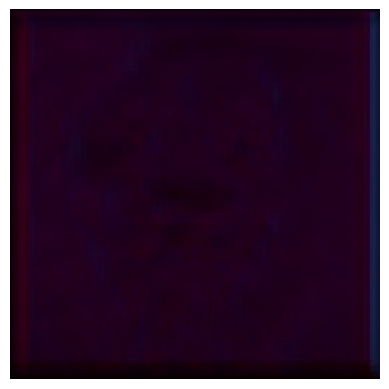

In [ ]:
plt.imshow(pred[0].reshape(SIZE,SIZE,3))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 19ms/step


(-0.5, 255.5, 255.5, -0.5)

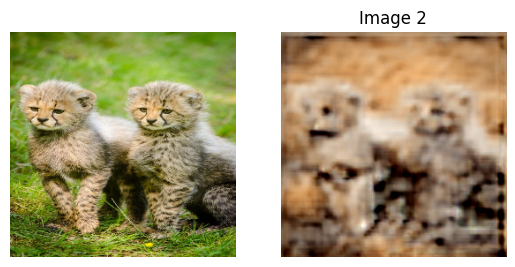

In [ ]:
# test
img_test = cv2.imread("animals/cheetahs-cubs-two-together-162318.jpeg")
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB) # change from BGR to RGB
img_test = cv2.resize(img_test, (SIZE, SIZE))
img_test = img_test.astype("float32")/ 255.
img_test = np.expand_dims(img_test, axis=0)

plt.subplot(1, 2, 1)
plt.imshow(img_test[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(model.predict(img_test)[0])
plt.title('Image 2')
plt.axis('off')

# Encoder Decoder Denoising

In [ ]:
# load data
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# reshape inputs
SIZE = 28
x_train = x_train.astype("float32")/255.
x_train = np.reshape(x_train, (len(x_train), SIZE, SIZE, 1))
x_test = x_test.astype("float32")/255.
x_test = np.reshape(x_test, (len(x_test), SIZE, SIZE, 1))

In [ ]:
# add noise
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# clipping
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

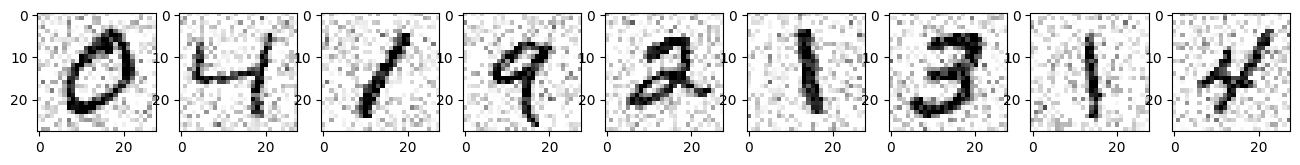

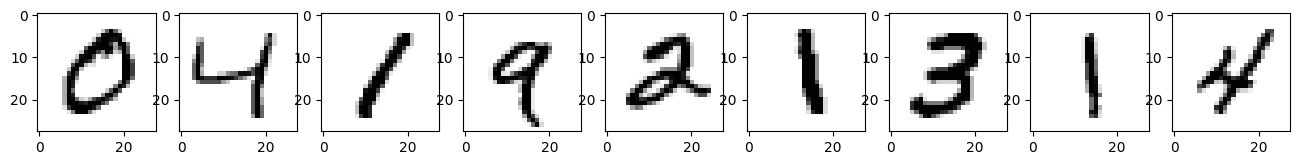

In [ ]:
plt.figure(figsize=(18,2))
for i in range(1,10):
  ax = plt.subplot(1, 10, i)
  plt.imshow(x_train_noisy[i].reshape(SIZE,SIZE), cmap="binary")
plt.figure(figsize=(18,2))
for i in range(1,10):
  ax = plt.subplot(1, 10, i)
  plt.imshow(x_train[i].reshape(SIZE,SIZE), cmap="binary")
plt.show()

In [ ]:
# clear session
clear_session()

In [ ]:
# define model
model = Sequential(name="seq_model")
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", input_shape=(SIZE, SIZE, 1), name= "conv_layer_one"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', name="max_pool_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_two"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_two"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_three"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_three"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_four"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_five"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_two"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation="relu", name= "conv_layer_six"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_three"))
model.add(Conv2D(filters=1, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_seven"))
model.summary()
# compile
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
# fit
model.fit(x_train_noisy, x_train, epochs=20, shuffle=True, verbose=0,
          batch_size=256, validation_data=(x_test_noisy, x_test))
# eval
eval = model.evaluate(x_test_noisy, x_test)

Model: "seq_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_one (Conv2D)     (None, 28, 28, 32)        320       
                                                                 
 max_pool_layer_one (MaxPoo  (None, 14, 14, 32)        0         
 ling2D)                                                         
                                                                 
 conv_layer_two (Conv2D)     (None, 14, 14, 8)         2312      
                                                                 
 max_pool_layer_two (MaxPoo  (None, 7, 7, 8)           0         
 ling2D)                                                         
                                                                 
 conv_layer_three (Conv2D)   (None, 7, 7, 8)           584       
                                                                 
 max_pool_layer_three (MaxP  (None, 4, 4, 8)           0 

In [ ]:
# save
# model.save("encoder.model")

313/313 [==============================] - 1s 2ms/step


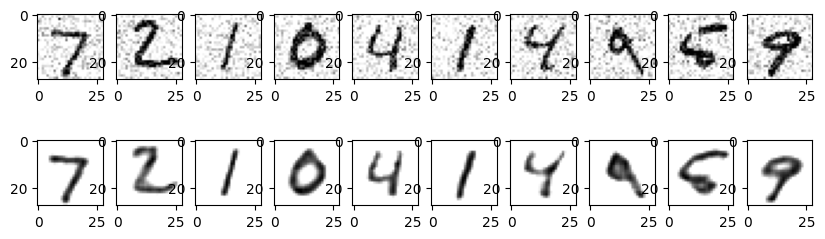

In [ ]:
# predict
pred = model.predict(x_test_noisy)
plt.figure(figsize=(10,3))
for i in range(10):
  ax = plt.subplot(2, 10, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap="binary")
  ax = plt.subplot(2, 10, 10+i+1)
  plt.imshow(pred[i].reshape(28,28), cmap="binary")

# Encoder Decoder Domain Adaption Using OpenCV

In [ ]:
def rotate_image(image, angle):
    # Get the image center
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotated_image

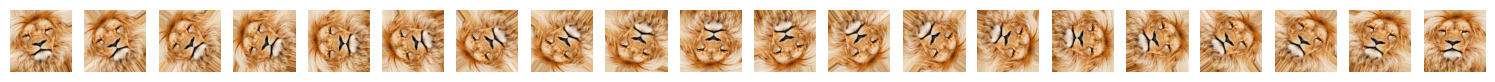

In [ ]:
# input img
SIZE = 256 # image shape: (SIZE, SIZE, 3)
num_rotations = 20 # number of rotations
img_data = [] # data set
img = cv2.imread("animals/africa-african-animal-cat-41315.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # change from BGR to RGB
img = cv2.resize(img, (SIZE, SIZE))
for i in range(num_rotations): # Rotate the image n times and save them in the list
    angle = (i + 1) * 360 / num_rotations
    img_rotated = rotate_image(img, angle)
    img_data.append(img_to_array(img_rotated)) # append
img_arr = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_arr = img_arr.astype("float32")/ 255. # scale

plt.figure(figsize=(num_rotations, 1)) # Display the original and rotated images
for i, img in enumerate(img_arr):
    plt.subplot(1, num_rotations + 1, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

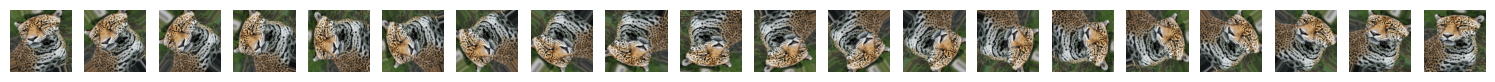

In [ ]:
# output image
img_decode = [] # data set of images in new domain
img = cv2.imread("animals/photo-1528238344097-a8994f7c74e4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # change from BGR to RGB
img = cv2.resize(img, (SIZE, SIZE))
for i in range(num_rotations): # Rotate the image n times and save them in the list
    angle = (i + 1) * 360 / num_rotations
    img_rotated = rotate_image(img, angle)
    img_decode.append(img_to_array(img_rotated)) # append
img_arr_new_domain = np.reshape(img_decode, (len(img_decode), SIZE, SIZE, 3))
img_arr_new_domain = img_arr_new_domain.astype("float32")/ 255. # scale

plt.figure(figsize=(num_rotations, 1)) # Display the original and rotated images
for i, img in enumerate(img_arr_new_domain):
    plt.subplot(1, num_rotations + 1, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

Model: "seq_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_one (Conv2D)     (None, 256, 256, 32)      896       
                                                                 
 max_pool_layer_one (MaxPoo  (None, 128, 128, 32)      0         
 ling2D)                                                         
                                                                 
 conv_layer_two (Conv2D)     (None, 128, 128, 8)       2312      
                                                                 
 max_pool_layer_two (MaxPoo  (None, 64, 64, 8)         0         
 ling2D)                                                         
                                                                 
 conv_layer_three (Conv2D)   (None, 64, 64, 8)         584       
                                                                 
 max_pool_layer_three (MaxP  (None, 32, 32, 8)         0 

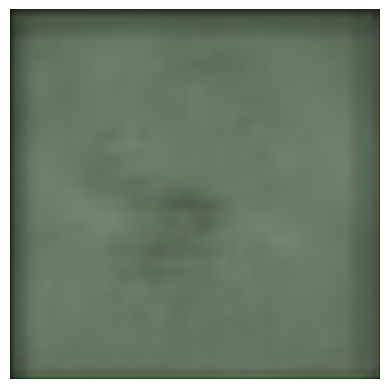

In [ ]:
# define model
clear_session() # clear session
model = Sequential(name="seq_model")
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", input_shape=(SIZE, SIZE, 3), name= "conv_layer_one"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', name="max_pool_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_two"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_two"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_three"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_three"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_four"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_five"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_two"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_six"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_three"))
model.add(Conv2D(filters=3, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_seven"))
model.summary()
# compile
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
# fit
model.fit(img_arr, img_arr_new_domain, epochs=1, shuffle=True, verbose=0)
# predict
pred = model.predict(img_arr)
# plot
plt.imshow(pred[-1].reshape(SIZE, SIZE, 3))
plt.axis('off')
plt.show()

# Encoder Decoder Domain Adaption Using ImageDataGenerator

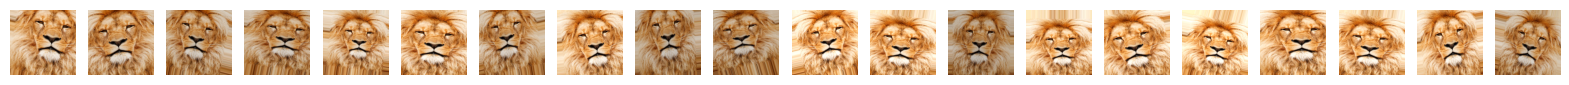

In [ ]:
# input imgs
SIZE = 256
num_aug = 20 # number of aug imgs
img_data = [] # data set
image_path = "animals/africa-african-animal-cat-41315.jpeg"
image = load_img(image_path)
_image_arr = img_to_array(image)
image_arr = resize(_image_arr, (SIZE, SIZE))
image_arr = np.expand_dims(image_arr, axis=0)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest')
seeds = np.random.randint(low=num_aug*10, size=num_aug)
for _ in range(num_aug): # generate images using the ImageDataGenerator
    augmented_image = datagen.flow(image_arr, seed=seeds[_]).next()[0]
    img_data.append(augmented_image.astype("float32")/255.)
input_images = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))

plt.figure(figsize=(num_aug, 1)) # Display images
for i, img in enumerate(input_images):
    plt.subplot(1, num_aug, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

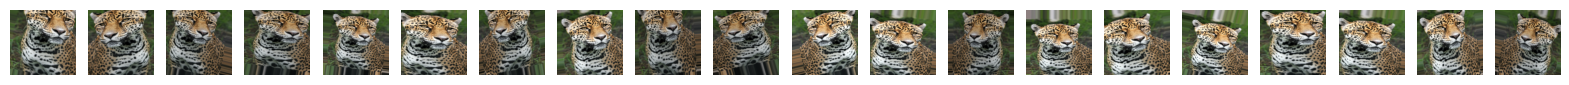

In [ ]:
# output imgs
img_data = [] # data set
image_path = "animals/photo-1528238344097-a8994f7c74e4.jpg"
image = load_img(image_path)
_image_arr = img_to_array(image)
image_arr = resize(_image_arr, (SIZE, SIZE))
image_arr = np.expand_dims(image_arr, axis=0)
for _ in range(num_aug):
    augmented_image = datagen.flow(image_arr, seed=seeds[_]).next()[0]
    img_data.append(augmented_image.astype("float32")/255.)
output_images = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))

plt.figure(figsize=(num_aug, 1))
for i, img in enumerate(output_images):
    plt.subplot(1, num_aug, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

Model: "seq_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_one (Conv2D)     (None, 256, 256, 32)      896       
                                                                 
 max_pool_layer_one (MaxPoo  (None, 128, 128, 32)      0         
 ling2D)                                                         
                                                                 
 conv_layer_two (Conv2D)     (None, 128, 128, 8)       2312      
                                                                 
 max_pool_layer_two (MaxPoo  (None, 64, 64, 8)         0         
 ling2D)                                                         
                                                                 
 conv_layer_three (Conv2D)   (None, 64, 64, 8)         584       
                                                                 
 max_pool_layer_three (MaxP  (None, 32, 32, 8)         0 

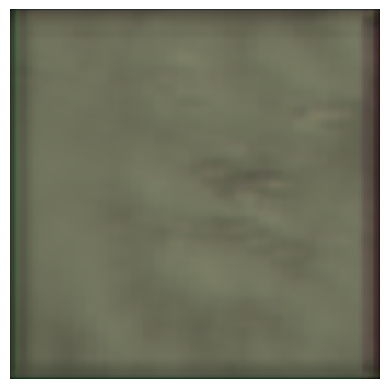

In [ ]:
# define model
clear_session() # clear session
model = Sequential(name="seq_model")
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", input_shape=(SIZE, SIZE, 3), name= "conv_layer_one"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', name="max_pool_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_two"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_two"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_three"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', name="max_pool_layer_three"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_four"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_one"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_five"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_two"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_six"))
model.add(UpSampling2D((2,2), name="up_smaple_layer_three"))
model.add(Conv2D(filters=3, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_seven"))
model.summary()
# compile
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
# fit
model.fit(input_images, output_images, epochs=50, shuffle=True, verbose=0)
# predict
pred = model.predict(input_images)
# plot
plt.imshow(pred[0].reshape(SIZE, SIZE, 3))
plt.axis('off')
plt.show()

# Encoder Decoder Image Colorization

In [ ]:
# read images
img_path = "animals/"
SIZE = 256
batch_size = 5
file_list = os.listdir(img_path)
img_data = [] # data set
output_data = []
for filename in file_list:
  if filename.endswith(('.png', '.jpg', '.jpeg')):
    image_path = os.path.join(img_path, filename)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (SIZE, SIZE))
    img = img.astype("float32")/255.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # change from BGR to LAB
    L, A, B = cv2.split(img)
    _AB = np.array([A, B])
    AB = np.einsum('kij->ijk', _AB)
    img_data.append(np.array(L))
    output_data.append(AB)
input = np.reshape(img_data, (len(img_data), SIZE, SIZE, 1)) / 100.
output = np.reshape(output_data, (len(output_data), SIZE, SIZE, 2)) / 128.

In [ ]:
# define model
clear_session() # clear session
model = Sequential(name="seq_model")
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=2, padding='same', activation="relu",
                 input_shape=(SIZE, SIZE, 1), name= "conv_layer_one"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_two"))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=2, padding='same', activation="relu", name= "conv_layer_three"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_four"))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=2, padding='same', activation="relu", name= "conv_layer_five"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_six"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_seven"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_eight"))
model.add(UpSampling2D(size=(2, 2), name="up_sample_layer_one"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_nine"))
model.add(UpSampling2D(size=(2, 2), name="up_sample_layer_two"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_ten"))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_eleven"))
model.add(Conv2D(filters=2, kernel_size=(3,3), padding='same', activation="relu", name= "conv_layer_twelve"))
model.add(UpSampling2D(size=(2, 2), name="up_sample_layer_three"))
model.summary()
# compile
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
# fit
model.fit(input, output, validation_split=0.2, batch_size=16, epochs=2, shuffle=True, verbose=2)

Model: "seq_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_one (Conv2D)     (None, 128, 128, 64)      640       
                                                                 
 conv_layer_two (Conv2D)     (None, 128, 128, 128)     73856     
                                                                 
 conv_layer_three (Conv2D)   (None, 64, 64, 128)       147584    
                                                                 
 conv_layer_four (Conv2D)    (None, 64, 64, 256)       295168    
                                                                 
 conv_layer_five (Conv2D)    (None, 32, 32, 256)       590080    
                                                                 
 conv_layer_six (Conv2D)     (None, 32, 32, 512)       1180160   
                                                                 
 conv_layer_seven (Conv2D)   (None, 32, 32, 256)       11

1/1 [==============================] - 1s 946ms/step


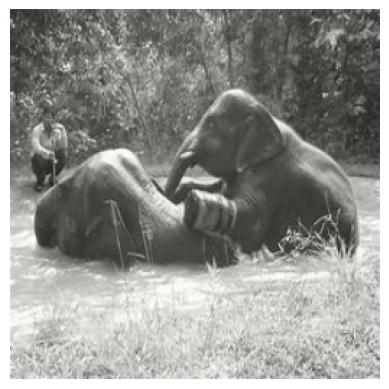

In [ ]:
# predict
test_img = np.expand_dims(input[0], axis=0)
pred = model.predict(test_img)
res = np.zeros((SIZE, SIZE, 3))
res[:,:,0] = test_img[0][:,:,0] * 100.
res[:,:,1:] = pred[0] * 128.
img = (color.lab2rgb(res) * 255).astype(np.uint8)
# plot
plt.imshow(img)
plt.axis('off')
plt.show()

# Encoder Decoder Anomaly Detection

## Data Engineering

In [ ]:
df = pd.read_csv("anomaly.csv")
df.head()

,Date,Power,Detector,Quality
0,1-Jan-16,96,8,Good
1,2-Jan-16,96,10,Good
2,3-Jan-16,91,8,Good
3,4-Jan-16,97,9,Good
4,5-Jan-16,91,11,Good


In [ ]:
df.groupby("Quality")["Quality"].count()

Quality
Bad      407
Good    1054
Name: Quality, dtype: int64

In [ ]:
df.drop(["Date"], axis=1, inplace=True)
df.dropna(inplace=True, axis=1)
df.Quality[df.Quality=="Good"] = 1
df.Quality[df.Quality=="Bad"] = 2

<ipython-input-46-36fc7c3f0594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality=="Good"] = 1
<ipython-input-46-36fc7c3f0594>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality[df.Quality=="Bad"] = 2


In [ ]:
mask_normal = (df["Quality"]==1)
mask_anormal = (df["Quality"]==2)

In [ ]:
type(mask_anormal)

pandas.core.series.Series

In [ ]:
df.drop("Quality", axis=1, inplace=True)

In [ ]:
df_normal = df[mask_normal]
df_anormal = df[mask_anormal]

In [ ]:
X_normal = df_normal.values
X_anormal = df_anormal.values

In [ ]:
X_normal.shape

(1054, 2)

## Network Architecture

In [ ]:
X_train, X_test = train_test_split(X_normal, test_size=.25, random_state=42)

In [ ]:
# define model
clear_session() # clear session
model = Sequential(name="seq_model")
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu", name="dense_layer_one"))
model.add(Dense(5, activation="relu", name="dense_layer_two"))
model.add(Dense(10, activation="relu", name="dense_layer_three"))
model.add(Dense(X_train.shape[1], name="dense_layer_four"))
model.summary()
# compile
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
# fit
model.fit(X_train, X_train, epochs=100, verbose=2)

Model: "seq_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_one (Dense)     (None, 10)                30        
                                                                 
 dense_layer_two (Dense)     (None, 5)                 55        
                                                                 
 dense_layer_three (Dense)   (None, 10)                60        
                                                                 
 dense_layer_four (Dense)    (None, 2)                 22        
                                                                 
Total params: 167 (668.00 Byte)
Trainable params: 167 (668.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
25/25 - 2s - loss: 968.3508 - accuracy: 1.0000 - 2s/epoch - 85ms/step
Epoch 2/100
25/25 - 0s - loss: 348.8731 - accuracy: 1.0000 - 155ms/ep

In [ ]:
# pred
_scores = []
_scores.append(np.sqrt(metrics.mean_squared_error(model.predict(X_test), X_test)))
_scores.append(np.sqrt(metrics.mean_squared_error(model.predict(X_normal), X_normal)))
_scores.append(np.sqrt(metrics.mean_squared_error(model.predict(X_anormal), X_anormal)))
scores = pd.DataFrame([_scores], columns=["X_test", "X_normal", "X_anormal"])
scores

13/13 [==============================] - 0s 3ms/step


,X_test,X_normal,X_anormal
0,1.004242,1.001853,2.533357


# Encoder Decoder LSTM Anomaly Detection

## Data Engineering

In [ ]:
dataframe = pd.read_csv("GE.csv")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-17,79.919998,80.660004,79.760002,80.489998,80.247856,8492200
1,2023-01-18,80.940002,81.180000,79.139999,79.269997,79.031525,7834300
2,2023-01-19,77.940002,78.750000,76.669998,76.860001,76.628777,10411700
3,2023-01-20,77.589996,77.750000,75.669998,77.680000,77.446312,8261300
4,2023-01-23,77.610001,80.019997,77.540001,79.769997,79.530022,10957500


In [ ]:
df = dataframe[["Date", "Close"]]
df.Date = pd.to_datetime(df.Date)
df.head()

<ipython-input-43-142d5051e2a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date = pd.to_datetime(df.Date)


,Date,Close
0,2023-01-17,80.489998
1,2023-01-18,79.269997
2,2023-01-19,76.860001
3,2023-01-20,77.680000
4,2023-01-23,79.769997


In [ ]:
df["Date"].dtype

dtype('<M8[ns]')

In [ ]:
len(df)

250

In [ ]:
print("Start data is:", df["Date"].min())
print("End data is:", df["Date"].max())

Start data is: 2023-01-17 00:00:00
End data is: 2024-01-12 00:00:00


<Axes: xlabel='Date', ylabel='Close'>

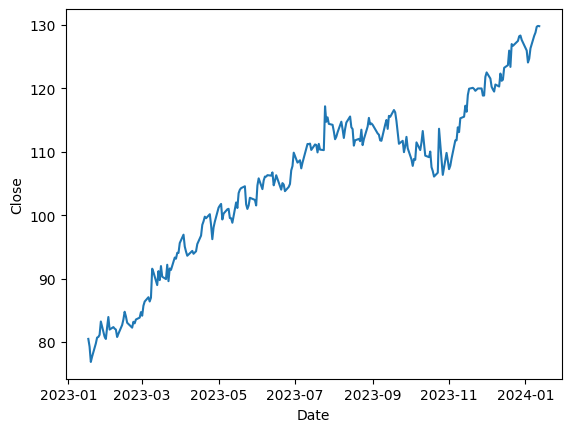

In [ ]:
sns.lineplot(x=df["Date"], y=df["Close"])


## Network Architecture

In [ ]:
X_train, X_test = df.loc[df["Date"] <= "2023-09-17"], df.loc[df["Date"] > "2023-09-17"]

In [ ]:
scaler = StandardScaler().fit(X_train[["Close"]])
X_train["Close"] = scaler.transform(X_train[["Close"]])
X_test["Close"] = scaler.transform(X_test[["Close"]])

<ipython-input-49-02b2fe57e065>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Close"] = scaler.transform(X_train[["Close"]])
<ipython-input-49-02b2fe57e065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Close"] = scaler.transform(X_test[["Close"]])


In [ ]:
seq_size = 15
def to_seq(x, y, seq_size=1):
  xval, yval = [], []
  for i in range(len(x)-seq_size):
    xval.append(x.iloc[i:(i+seq_size)].values)
    yval.append(y.iloc[i+seq_size].values)
  return np.array(xval), np.array(yval)

Xtrain, Ytrain = to_seq(X_train[["Close"]], X_train[["Close"]], seq_size)
Xtest, Ytest = to_seq(X_test[["Close"]], X_test[["Close"]], seq_size)

In [ ]:
print(Xtrain.shape, Ytrain.shape)

(153, 15, 1) (153, 1)


Model: "seq_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer_one (LSTM)       (None, 128)               66560     
                                                                 
 drop_out_layer_one (Dropou  (None, 128)               0         
 t)                                                              
                                                                 
 repeat_vec_layer_one (Repe  (None, 15, 128)           0         
 atVector)                                                       
                                                                 
 lstm_layer_two (LSTM)       (None, 15, 128)           131584    
                                                                 
 drop_out_layer_two (Dropou  (None, 15, 128)           0         
 t)                                                              
                                                         

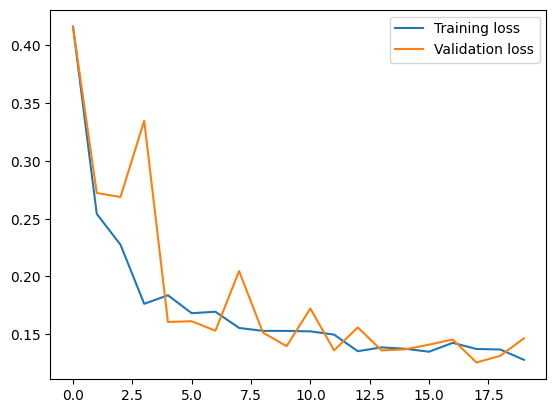

In [ ]:
# define model
clear_session() # clear session
model = Sequential(name="seq_model")
model.add(LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2]), name="lstm_layer_one"))
model.add(Dropout(rate=0.2, name="drop_out_layer_one"))
model.add(RepeatVector(Xtrain.shape[1], name="repeat_vec_layer_one"))
model.add(LSTM(128, return_sequences=True, name="lstm_layer_two"))
model.add(Dropout(rate=0.2, name="drop_out_layer_two"))
model.add(TimeDistributed(Dense(Xtrain.shape[2]), name="time_distrib_layer_one"))
model.summary()
# compile
model.compile(optimizer="adam", loss="mean_absolute_error")
# fit
history = model.fit(Xtrain, Ytrain, epochs=20, batch_size=20,
                    validation_split=0.1, verbose=2)
# plot
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()

3/3 [==============================] - 0s 10ms/step


(array([3., 2., 1., 2., 4., 4., 6., 6., 1., 3., 5., 4., 4., 2., 1., 2., 0.,
        1., 2., 1., 1., 1., 3., 1., 0., 0., 1., 0., 3., 3.]),
 array([0.1168673 , 0.12535521, 0.13384311, 0.14233101, 0.15081892,
        0.15930682, 0.16779473, 0.17628263, 0.18477054, 0.19325844,
        0.20174634, 0.21023425, 0.21872215, 0.22721006, 0.23569796,
        0.24418586, 0.25267377, 0.26116167, 0.26964958, 0.27813748,
        0.28662539, 0.29511329, 0.30360119, 0.3120891 , 0.320577  ,
        0.32906491, 0.33755281, 0.34604071, 0.35452862, 0.36301652,
        0.37150443]),
 <BarContainer object of 30 artists>)

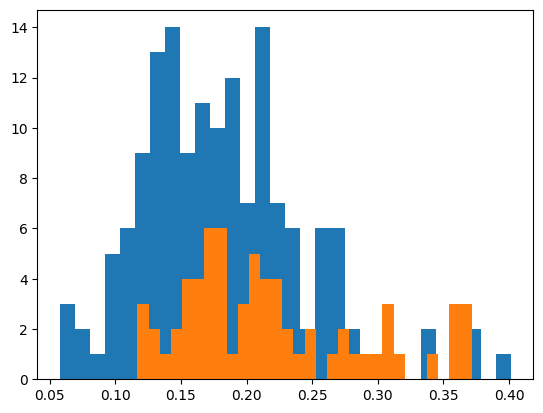

In [ ]:
# pred
pred_train = model.predict(Xtrain)
Xtrain_mae = np.mean(np.abs(pred_train-Xtrain), axis=1)
plt.hist(Xtrain_mae, bins=30)
threshold = 0.3
pred_test = model.predict(Xtest)
Xtest_mae = np.mean(np.abs(pred_test-Xtest), axis=1)
plt.hist(Xtest_mae, bins=30)

In [ ]:
anomaly_df = pd.DataFrame(X_test[seq_size:])
anomaly_df["testMAE"] = Xtest_mae
anomaly_df["max_trainMAE"] = threshold
anomaly_df["anomaly"] = anomaly_df["testMAE"] > anomaly_df["max_trainMAE"]
anomaly_df["Close"] = X_test[seq_size:]["Close"]

<Axes: xlabel='Date', ylabel='testMAE'>

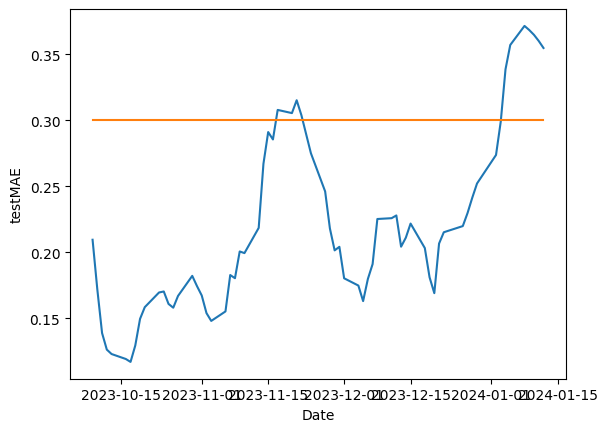

In [ ]:
sns.lineplot(x=anomaly_df["Date"], y=anomaly_df["testMAE"])
sns.lineplot(x=anomaly_df["Date"], y=anomaly_df["max_trainMAE"])

In [ ]:
scaler.inverse_transform([anomaly_df["Close"]])

array([[110.260002, 111.480003, 113.260002, 111.330002, 109.379997,
        109.139999, 110.019997, 107.57    , 106.949997, 106.080002,
        106.690002, 113.620003, 111.199997, 108.800003, 106.349998,
        109.809998, 108.629997, 107.25    , 107.779999, 108.919998,
        111.779999, 111.800003, 113.849998, 113.089996, 115.269997,
        115.519997, 117.25    , 116.300003, 118.940002, 119.93    ,
        120.07    , 119.889999, 119.599998, 119.970001, 119.970001,
        118.849998, 118.860001, 121.800003, 122.5     , 121.529999,
        120.230003, 119.809998, 119.480003, 120.589996, 120.279999,
        122.32    , 121.18    , 121.349998, 123.230003, 123.639999,
        125.940002, 123.370003, 126.970001, 126.690002, 127.470001,
        128.199997, 128.320007, 127.629997, 125.949997, 124.059998,
        124.660004, 126.290001, 128.279999, 128.779999, 129.699997,
        129.830002, 129.789993]])

<Axes: xlabel='Date'>

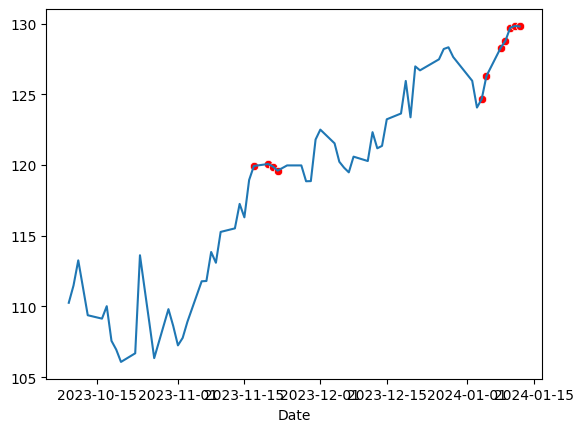

In [ ]:
anomalies = anomaly_df.loc[anomaly_df["anomaly"] == True]
sns.lineplot(x=anomaly_df["Date"], y=scaler.inverse_transform([anomaly_df["Close"]])[0])
sns.scatterplot(x=anomalies["Date"], y=scaler.inverse_transform([anomalies["Close"]])[0], color="red")

# Variational Auto Encoder

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
rand_ind = np.random.choice(len(x_train), 2000, replace=False)
x_train, y_train = x_train[rand_ind], y_train[rand_ind]
rand_ind = np.random.choice(len(x_test), 200, replace=False)
x_test, y_test = x_test[rand_ind], y_test[rand_ind]

In [ ]:
x_train = x_train.astype("float32")/ 255.
x_test = x_test.astype("float32")/ 255.

In [ ]:
img_width, img_height = x_train.shape[1], x_train.shape[2]
num_channels = 1
input_shape = (img_width, img_height, num_channels)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, num_channels)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, num_channels)

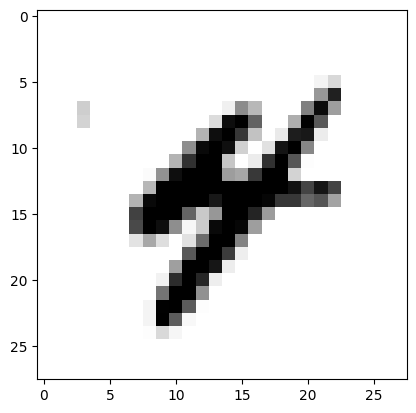

In [ ]:
plt.figure(1)
plt.subplot(111)
plt.imshow(x_train[32][:,:,0], cmap="gray_r")

In [ ]:
clear_session()
disable_eager_execution()
latent_dim = 2
input_img = Input(shape=input_shape, name="encoder_input")
x = Conv2D(32, 3, padding="same", activation="relu")(input_img)
x = Conv2D(64, 3, padding="same", activation="relu", strides=(2,2))(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
conv_shape = backend.int_shape(x)
x = Flatten()(x)
x = Dense(32, activation="relu")(x)
z_mu = Dense(latent_dim, name="latent_mu")(x)
z_sigma = Dense(latent_dim, name="latent_sigma")(x)
def sample_z(args):
  z_mu, z_sigma = args
  eps = backend.random_normal(shape=(backend.shape(z_mu)[0],
                                     backend.int_shape(z_mu)[1]))
  return z_mu + backend.exp(z_sigma/2.) * eps
z = Lambda(sample_z, output_shape=(latent_dim, ), name="z")([z_mu, z_sigma])
encoder = Model(input_img, [z_mu, z_sigma, z], name="encoder")
print(encoder.summary())
decoder_input = Input(shape=(latent_dim, ), name="decoder_input")
x = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3],
          activation="relu")(decoder_input)
x = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
x = Conv2DTranspose(32, 3, padding="same", activation="relu", strides=(2,2))(x)
x = Conv2DTranspose(num_channels, 3, padding="same", activation="sigmoid", name="decoder_output")(x)
decoder = Model(decoder_input, x, name="decoder")
decoder.summary()
z_decoded = decoder(z)
class CustumLayer(Layer):
  def vae_loss(self, x, z_decoded):
    x = backend.flatten(x)
    z_decoded = backend.flatten(z_decoded)
    recon_loss = metrics.binary_crossentropy(x, z_decoded)
    kl_loss = -5e-1 * backend.mean(1 + z_sigma - backend.square(z_mu) - backend.exp(z_sigma), axis=-1)
    return backend.mean(recon_loss + 1e-3*kl_loss)
  def call(self, inputs):
    x = inputs[0]
    z_decoded = inputs[1]
    loss = self.vae_loss(x, z_decoded)
    self.add_loss(loss, inputs=inputs)
    return x
y = CustumLayer()([input_img, z_decoded])
vae = Model(input_img, y, name="vae")
vae.compile(optimizer="adam", loss=None)
vae.summary()
vae.fit(x_train, None, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 32)           320       ['encoder_input[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)           (None, 14, 14, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 14, 14, 64)           36928     ['conv2d_1[0][0]']            
                                                                                            

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 32)           320       ['encoder_input[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)           (None, 14, 14, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 14, 14, 64)           36928     ['conv2d_1[0][0]']            
                                                                                                

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1600/1600 - 12s - loss: 0.4195 - val_loss: 0.2706 - 12s/epoch - 7ms/sample
Epoch 2/20
1600/1600 - 7s - loss: 0.2659 - val_loss: 0.2611 - 7s/epoch - 4ms/sample
Epoch 3/20
1600/1600 - 8s - loss: 0.2566 - val_loss: 0.2536 - 8s/epoch - 5ms/sample
Epoch 4/20
1600/1600 - 7s - loss: 0.2495 - val_loss: 0.2495 - 7s/epoch - 4ms/sample
Epoch 5/20
1600/1600 - 8s - loss: 0.2436 - val_loss: 0.2394 - 8s/epoch - 5ms/sample
Epoch 6/20
1600/1600 - 7s - loss: 0.2335 - val_loss: 0.2306 - 7s/epoch - 4ms/sample
Epoch 7/20
1600/1600 - 9s - loss: 0.2271 - val_loss: 0.2273 - 9s/epoch - 6ms/sample
Epoch 8/20
1600/1600 - 8s - loss: 0.2241 - val_loss: 0.2235 - 8s/epoch - 5ms/sample
Epoch 9/20
1600/1600 - 7s - loss: 0.2216 - val_loss: 0.2220 - 7s/epoch - 5ms/sample
Epoch 10/20
1600/1600 - 8s - loss: 0.2201 - val_loss: 0.2208 - 8s/epoch - 5ms/sample
Epoch 11/20
1600/1600 - 7s - loss: 0.2190 - val_loss: 0.2194 - 7s/epoch - 4ms/sample
Epoch 12/20
1600/1600 - 8s - loss: 0.2182 - val_loss: 0.2192 - 8s/epoch - 5ms/sampl

In [ ]:
print("Encoder:", encoder.output_shape, "\nDecoder:", decoder.output_shape, "\nVAE:", vae.output_shape)

Encoder: [(None, 2), (None, 2), (None, 2)] 
Decoder: (None, 28, 28, 1) 
VAE: (None, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


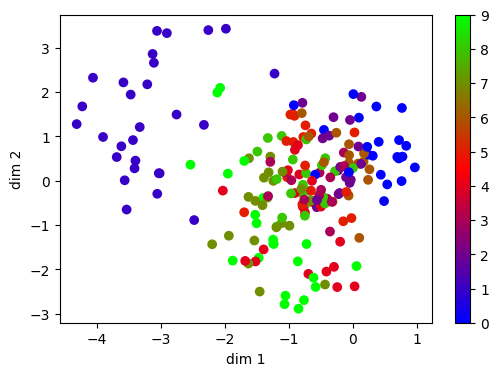

In [ ]:
mu, _, _ = encoder.predict(x_test)
plt.figure(figsize=(6,4))
plt.scatter(mu[:,0], mu[:,1], c=y_test, cmap="brg")
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.colorbar()
plt.show()

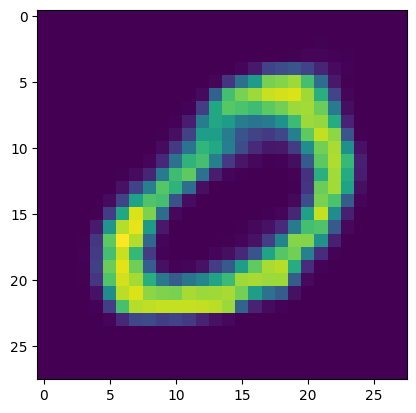

In [ ]:
sample_vec = np.array([[1,3]])
_decoded_example = decoder.predict(sample_vec)
decoded_example = _decoded_example.reshape(img_width, img_height)
plt.imshow(decoded_example)

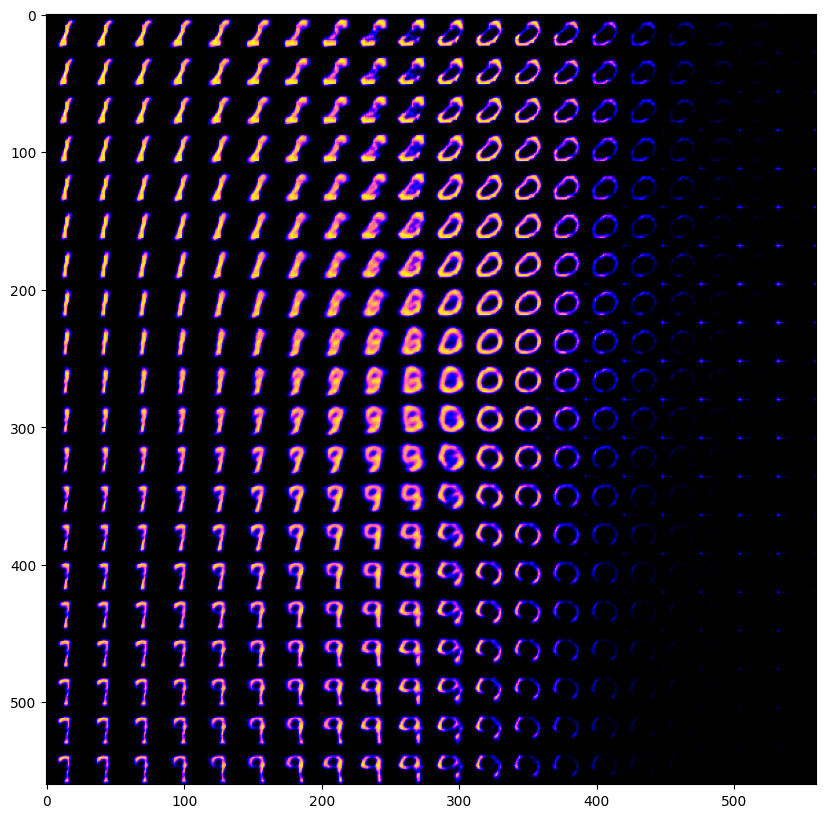

In [ ]:
n = 20
figure = np.zeros((img_width * n, img_height * n, num_channels))
grid_x = np.linspace(-5, 5, n)
grid_y = np.linspace(-5, 5, n)[::-1]
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(img_width, img_height, num_channels)
        figure[i * img_width: (i + 1) * img_width,
               j * img_height: (j + 1) * img_height] = digit
plt.figure(figsize=(10, 10))
fig_shape = np.shape(figure)
figure = figure.reshape((fig_shape[0], fig_shape[1]))
plt.imshow(figure, cmap='gnuplot2')
plt.show()

# Conditional Variational Auto Encoder

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
rand_ind = np.random.choice(len(x_train), 2000, replace=False)
x_train, y_train = x_train[rand_ind], y_train[rand_ind]
rand_ind = np.random.choice(len(x_test), 200, replace=False)
x_test, y_test = x_test[rand_ind], y_test[rand_ind]

In [ ]:
x_train = x_train.astype("float32")/ 255.
x_test = x_test.astype("float32")/ 255.

In [ ]:
img_width, img_height = x_train.shape[1], x_train.shape[2]
num_channels = 1
input_shape = (img_width, img_height, num_channels)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, num_channels)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, num_channels)

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

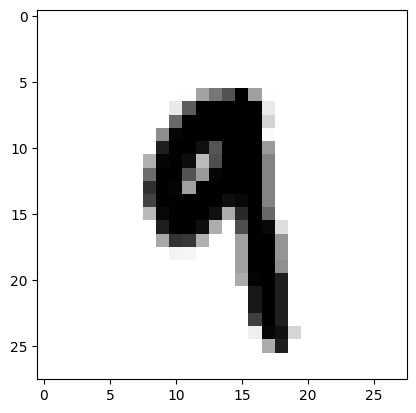

In [ ]:
plt.figure(1)
plt.subplot(111)
plt.imshow(x_train[32][:,:,0], cmap="gray_r")

In [ ]:
clear_session()
disable_eager_execution()
latent_dim = 2
input_img = Input(shape=input_shape, name="encoder_input")
img_label = Input(shape=(num_classes,), name="conditional_info")
x = Conv2D(32, 3, padding="same", activation="relu")(input_img)
x = Conv2D(64, 3, padding="same", activation="relu", strides=(2,2))(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
conv_shape = backend.int_shape(x)
x = Flatten()(x)
x = Dense(32, activation="relu")(x)
x = Concatenate()([x, img_label])
z_mu = Dense(latent_dim, name="latent_mu")(x)
z_sigma = Dense(latent_dim, name="latent_sigma")(x)
def sample_z(args):
  z_mu, z_sigma = args
  eps = backend.random_normal(shape=(backend.shape(z_mu)[0],
                                     backend.int_shape(z_mu)[1]))
  return z_mu + backend.exp(z_sigma/2.) * eps
z = Lambda(sample_z, output_shape=(latent_dim, ), name="z")([z_mu, z_sigma])
encoder = Model([input_img, img_label], [z_mu, z_sigma, z], name="encoder")
print(encoder.summary())
decoder_input = Input(shape=(latent_dim, ), name="decoder_input")
x = Concatenate()([decoder_input, img_label])
x = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3],
          activation="relu")(x)
x = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
x = Conv2DTranspose(32, 3, padding="same", activation="relu", strides=(2,2))(x)
x = Conv2DTranspose(num_channels, 3, padding="same", activation="sigmoid", name="decoder_output")(x)
decoder = Model([decoder_input, img_label], x, name="decoder")
decoder.summary()
z_decoded = decoder([z, img_label])
class CustumLayer(Layer):
  def vae_loss(self, x, z_decoded):
    x = backend.flatten(x)
    z_decoded = backend.flatten(z_decoded)
    recon_loss = metrics.binary_crossentropy(x, z_decoded)
    kl_loss = -5e-1 * backend.mean(1 + z_sigma - backend.square(z_mu) - backend.exp(z_sigma), axis=-1)
    return backend.mean(recon_loss + 1e-3*kl_loss)
  def call(self, inputs):
    x = inputs[0]
    z_decoded = inputs[1]
    loss = self.vae_loss(x, z_decoded)
    self.add_loss(loss, inputs=inputs)
    return x
y = CustumLayer()([input_img, z_decoded, img_label])
cvae = Model([input_img, img_label], y, name="cvae")
cvae.compile(optimizer="adam", loss=None)
cvae.summary()
cvae.fit([x_train, y_train], None, epochs=2, batch_size=32, validation_split=0.2, verbose=2)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 32)           320       ['encoder_input[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)           (None, 14, 14, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 14, 14, 64)           36928     ['conv2d_1[0][0]']            
                                                                                            

Model: "cvae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 32)           320       ['encoder_input[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)           (None, 14, 14, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 14, 14, 64)           36928     ['conv2d_1[0][0]']            
                                                                                               

In [ ]:
print("Encoder:", encoder.output_shape, "\nDecoder:", decoder.output_shape, "\nCanditional VAE:", cvae.output_shape)

Encoder: [(None, 2), (None, 2), (None, 2)] 
Decoder: (None, 28, 28, 1) 
Canditional VAE: (None, 28, 28, 1)


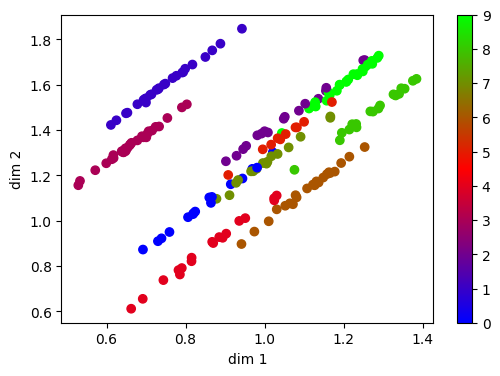

In [ ]:
mu, _, _ = encoder.predict([x_test, y_test])
plt.figure(figsize=(6,4))
plt.scatter(mu[:,0], mu[:,1], c=np.argmax(y_test, axis=1), cmap="brg")
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.colorbar()
plt.show()